# Day 5, Part 2 - Planets in 3D and plotting 3D things

In [26]:
# usual things:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
#%matplotlib notebook

There are a few different ways we can make some systems in 3D.  The easiest is to take our original "by hand" systems and just add in a 3D component, and call our solver with the 3D tag.  We can also simulate a kepler system in 3D as there is a 3D component to most if not all planetary systems.  We'll try each of these.

## 1. By-Hand Planetary systems in 3d

We'll start by taking our original Hermite solving datasets and inputting things in 3D:

In [27]:
star_mass = 1.0 # stellar mass in Msun
planet_masses = np.array( [1.0, 0.5] ) # planet masses in Mjupiter

# [x,y,z] coords for each planet in AU
# NOTE: no z-coords!  These will be set to zero later on 
#   if you make them non-zero
planet_initial_position = np.array([ [1.0, 0.0, 1.0], 
                                     [1.0, 0.0, 0.0]])

# planet's velocity at each position in km/s
# NOTE: no z-velocities!  These will be set to zero later on 
#   if you make them non-zero
planet_initial_velocity = np.array([ [0.0, 35,   0.0],
                                     [0.0, 15.0, 15.0]])

# note: this assumes that the star is at (0, 0, 0) and has zero 
#  initial velocity

We then call the Hermite solver as follows:

In [28]:
from hermite_library import do_hermite
r_h, v_h, t_h, E_h = do_hermite(star_mass, 
                                planet_masses, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                               tfinal=1e7, Nsteps=8800,
                               threeDee=True) # so sneaky, here the whole time!

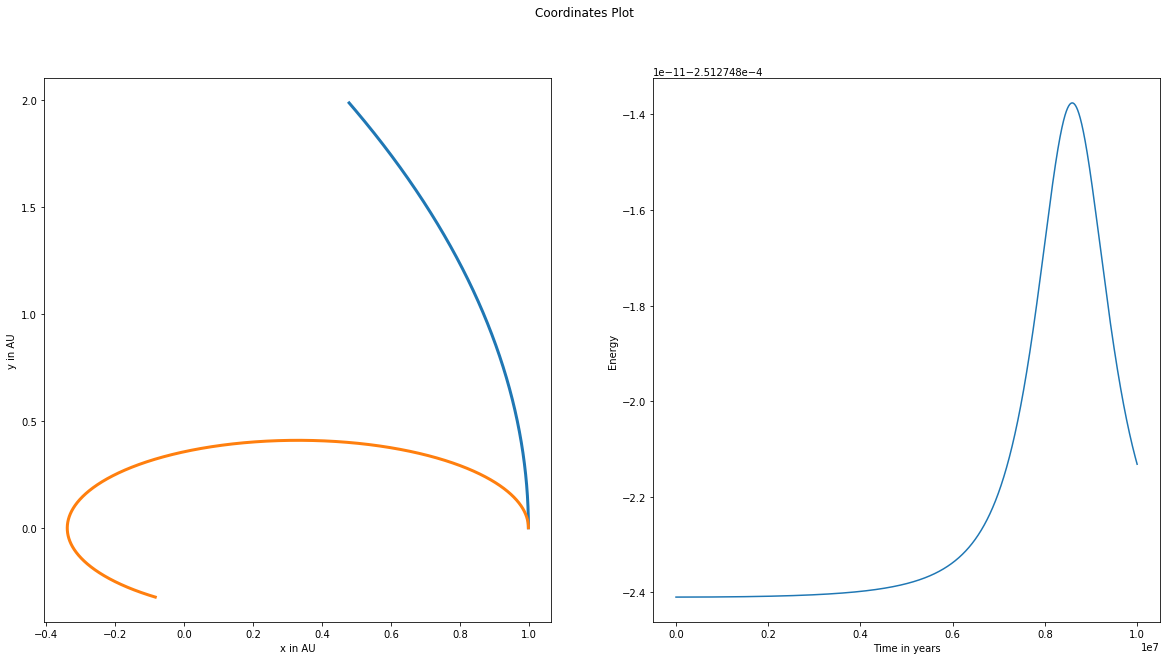

In [29]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# recall:
# r_h[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
for i in range(len(planet_masses)):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t_h, E_h)

plt.show()

Ok, but wait.  This is only plotting x vs. y.  How can we show all coordinates?  We'll get more into 3D plots next week, but for now, we can plot all combinations by having more than one coordinates plot:

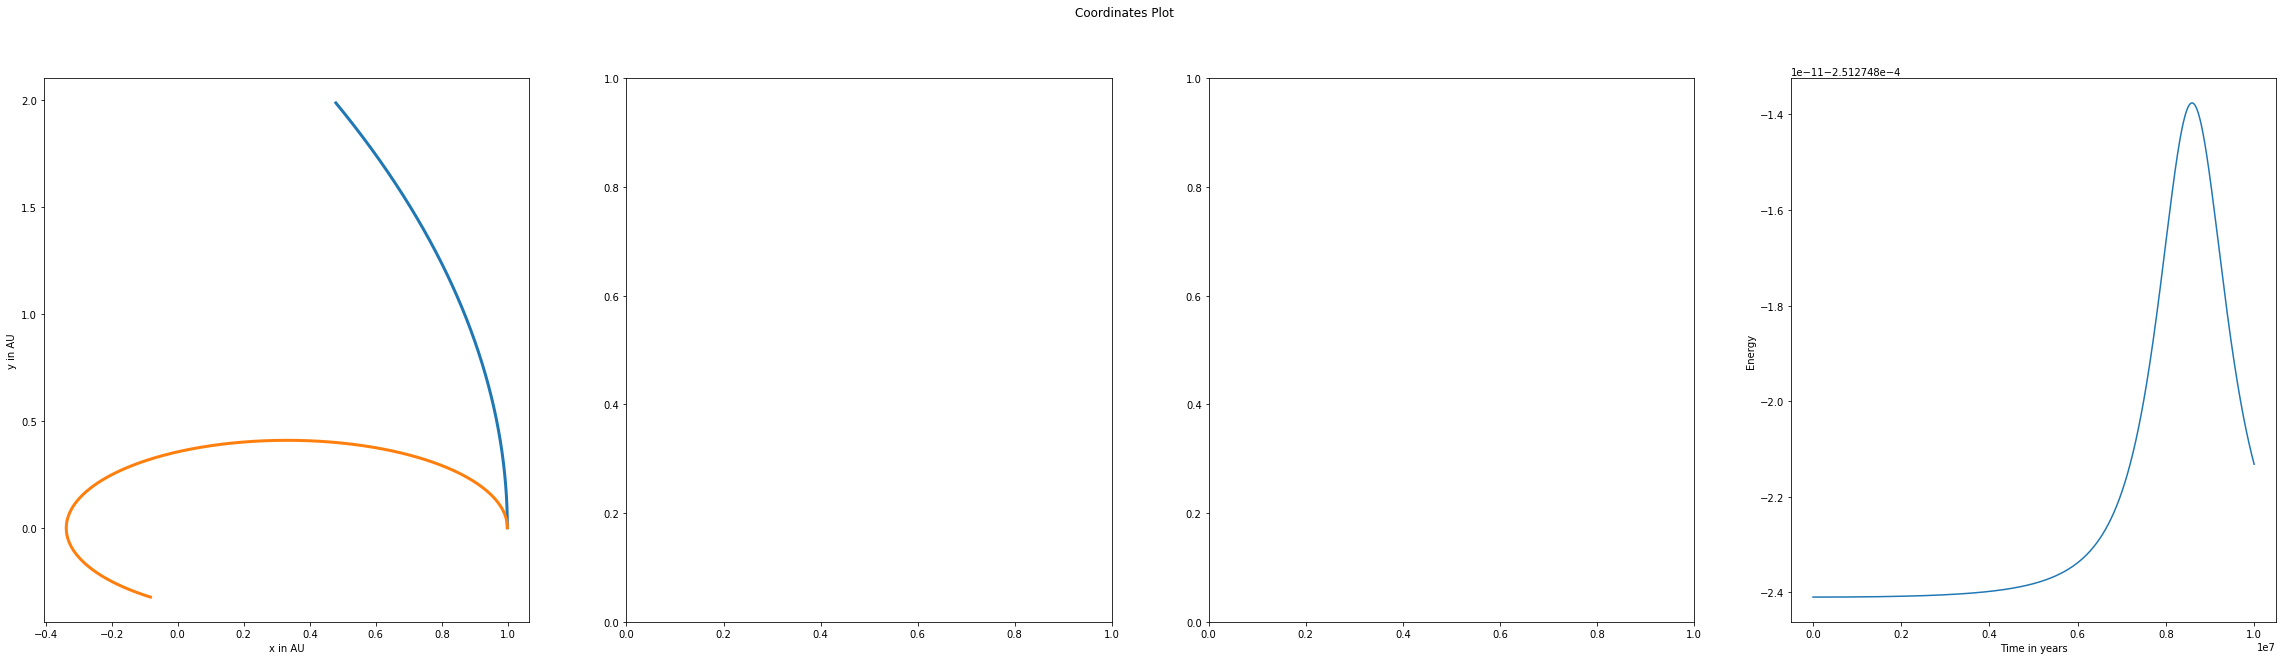

In [30]:
# now make 4 plots instead of 2, and make it 4x wide as tall
fig, ax = plt.subplots(1, 4, figsize = (10*4, 10))
fig.suptitle('Coordinates Plot')

# X vs Y means 0th vs 1st coordinate axes
# recall:
# r_h[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
for i in range(len(planet_masses)):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

    
    
# make *last* plot energy
ax[3].set_xlabel('Time in years')
ax[3].set_ylabel('Energy')
# re-norm energy
ax[3].plot(t_h, E_h)

plt.show()

Now we'll fill in the other axis combinations:

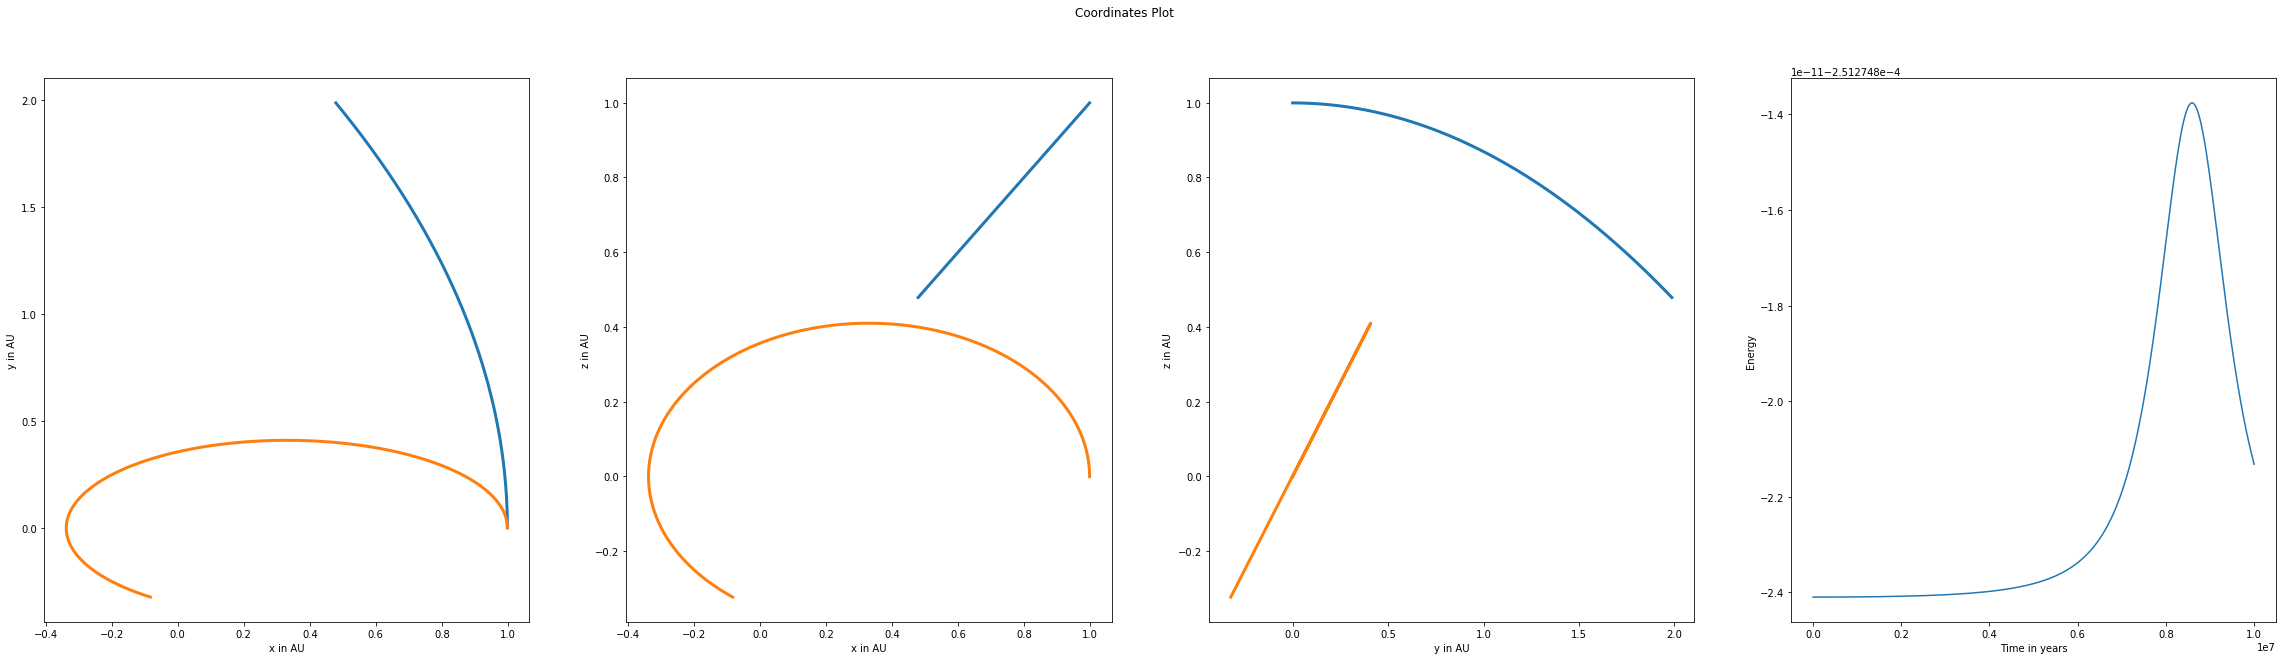

In [31]:
# now make 4 plots instead of 2, and make it 4x wide as tall
fig, ax = plt.subplots(1, 4, figsize = (10*4, 10))
fig.suptitle('Coordinates Plot')

# X vs Y means 0th vs 1st coordinate axes
# ax[0] means first plot
# recall:
# r_h[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
for i in range(len(planet_masses)):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

# X vs Z means 0th vs 2nd coordinate axes
# ax[1] means 2nd plot
ax[1].set_xlabel('x in AU')
ax[1].set_ylabel('z in AU')
for i in range(len(planet_masses)):
    ax[1].plot(r_h[i,0,:], r_h[i,2,:], lw=3)

# Y vs Z means 1th vs 2nd coordinate axes
# ax[2] means 3rd plot
ax[2].set_xlabel('y in AU')
ax[2].set_ylabel('z in AU')
for i in range(len(planet_masses)):
    ax[2].plot(r_h[i,1,:], r_h[i,2,:], lw=3)
    
    
# make *last* plot energy
ax[3].set_xlabel('Time in years')
ax[3].set_ylabel('Energy')
# re-norm energy
ax[3].plot(t_h, E_h)

plt.show()

So this gives us additional information.  It is still hard to see exactly what is going on, but we are getting a little bit more information.  Next week we'll do some 3D movies and see what we can gain from them, but for now, we'll stay with these.

We can also do the kepler system orbits in 3D, again with a few assumptions folded in.  To do this we'll use the inclination of the orbit as well:

![](http://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/orbitalelements.2.jpg)

First we'll read in the kepler data before from one of our systems.  We have to make sure we have the `convert_kepler_data.py` file in our `.ipynb` directory.

In [32]:
from convert_kepler_data import read_kepler_data
kepler_data = read_kepler_data('kepler101data.txt')

In [33]:
from convert_kepler_data import convert_kepler_data

star_mass, \
planet_masses, \
planet_initial_position, \
planet_initial_velocity, ecc = convert_kepler_data(kepler_data, use_inclination_3d=True)

Let's quickly remind ourselves what this system looks like:

In [34]:
star_mass

1.17

In [35]:
planet_masses

array([0.16, 0.01])

In [36]:
planet_initial_position, planet_initial_velocity

(array([[-0.0433236 ,  0.        ,  0.        ],
        [ 0.06672647,  0.01359057,  0.00643701]]),
 array([[   0.        , -141.87933522,    0.        ],
        [ -24.65587511,  121.05448789,    0.        ]]))

Ok, this is a 2 planet system with a central star of 1.17$M_\odot$ masses (i.e. 1.17 times the mass of the Sun). 

Let's do a sim!

In [37]:
# solve
# h is for hermite!
r_h, v_h, t_h, E_h = do_hermite(star_mass, 
                                planet_masses, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                               tfinal=1e4*5000, Nsteps=5000, 
                               threeDee=True)

We can then use the exact same plotting routine we used before to plot this:

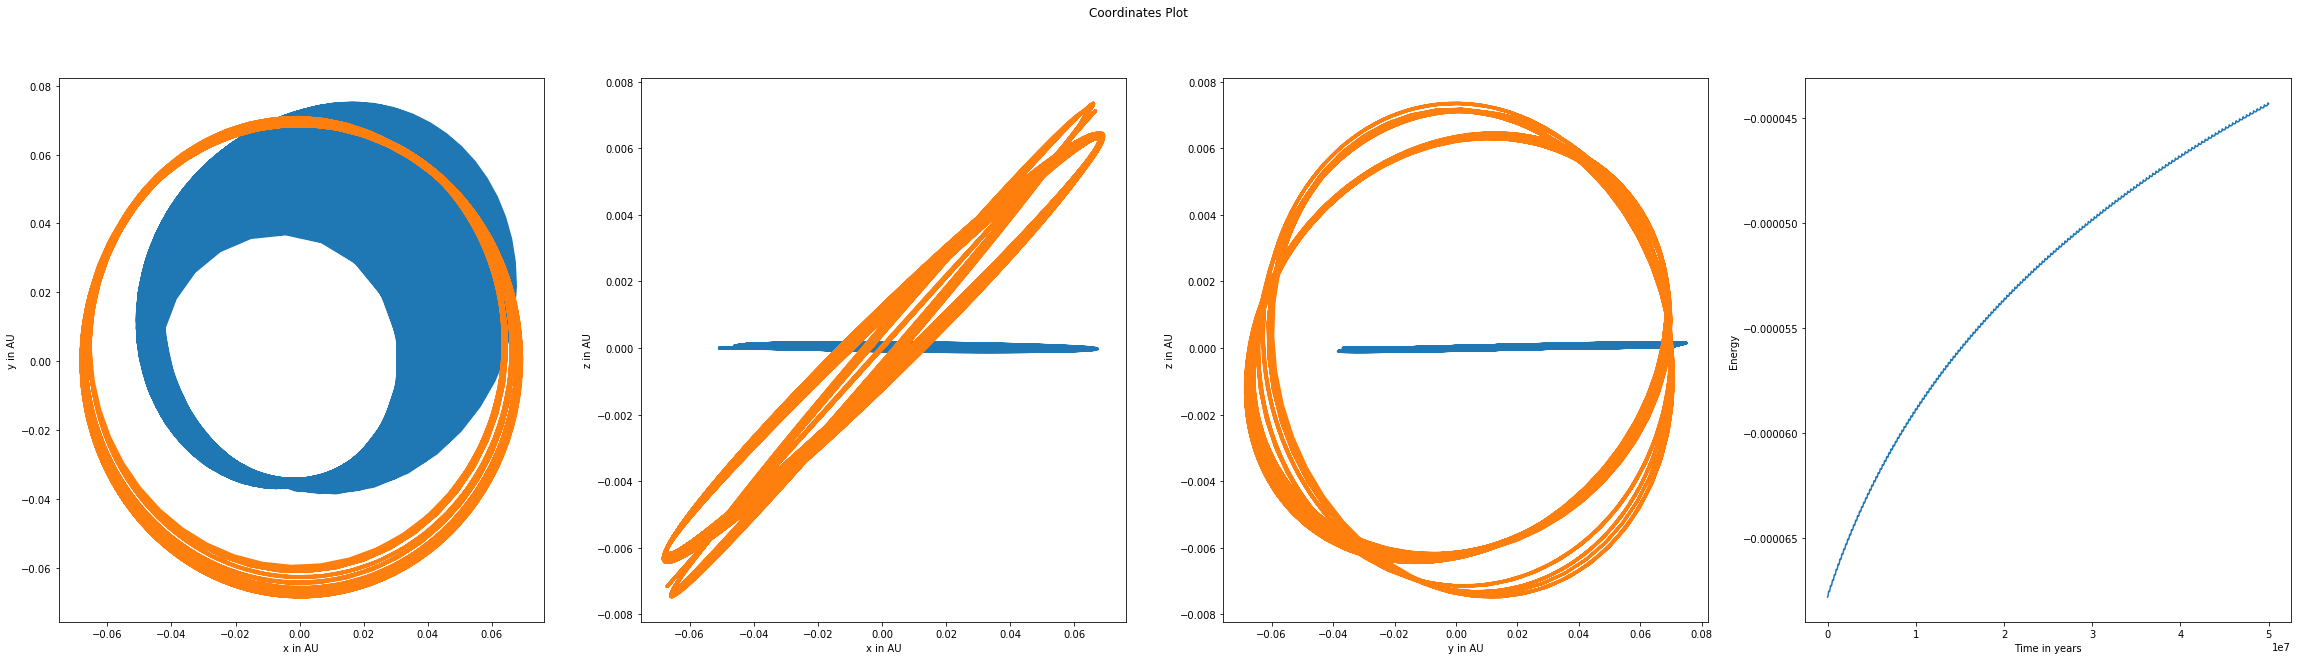

In [38]:
# now make 4 plots instead of 2, and make it 4x wide as tall
fig, ax = plt.subplots(1, 4, figsize = (10*4, 10))
fig.suptitle('Coordinates Plot')

# X vs Y means 0th vs 1st coordinate axes
# ax[0] means first plot
# recall:
# r_h[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
for i in range(len(planet_masses)):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

# X vs Z means 0th vs 2nd coordinate axes
# ax[1] means 2nd plot
ax[1].set_xlabel('x in AU')
ax[1].set_ylabel('z in AU')
for i in range(len(planet_masses)):
    ax[1].plot(r_h[i,0,:], r_h[i,2,:], lw=3)

# Y vs Z means 1th vs 2nd coordinate axes
# ax[2] means 3rd plot
ax[2].set_xlabel('y in AU')
ax[2].set_ylabel('z in AU')
for i in range(len(planet_masses)):
    ax[2].plot(r_h[i,1,:], r_h[i,2,:], lw=3)
    
    
# make *last* plot energy
ax[3].set_xlabel('Time in years')
ax[3].set_ylabel('Energy')
# re-norm energy
ax[3].plot(t_h, E_h)

plt.show()

Don't forget, if I like this simulation, I can save it!

In [39]:
from hermite_library import save_hermite_solution_to_file
save_hermite_solution_to_file("MyPlanetarySystem2.txt", 
                             t_h, E_h, r_h, v_h)

### Exercise
You have a few options: you can make your own systems "by hand" in 3D and go from there - making sure to save any simulations you like.

You can play more with this Kepler system or the Kepler-11 data set (or go find your own on the exoplanet archive).

You can start with a Kepler system and then add another planet "by hand" to see if you can disrupt the system!